<a href="https://colab.research.google.com/github/CarlosTertuliano/imersao_dados_4/blob/main/imersao_dados_4_dia_1_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

---





In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Ao importar o *Pandas* e realizar a leitura do arquivo *.csv* é utilizada a função *head()* para verificar se as informações foram obtidas corretamente.

In [ ]:
dados.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1582,"Rua Oliveira Dias, 366",Jardim Paulista,São Paulo,530,4,5,4,R$ 4.800.000


Outra forma de verificar isso é utilizando a função *sample( )* que irá retornar o valor de uma linha aleatória.

In [ ]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


Utilizando a função *describe( )* é possível ter uma breve noção de que os dados possuem uma grande amplitude. E já surgem algumas dúvidas, será que esses valores máximos são todos referentes ao mesmo lugar? 

Realmente são 750.000 m²?

Os tipos de imóveis a serem vendidos são bem diferente, pois não é comum um apartamento ou uma casa com 50 vagas de garagens. 

Enfim, deixando a enrolação de lado, vamos atrás das respostas!

In [ ]:
dados.query("Metragem == 750000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


Logo de cara vemos que o imóvel que possui a maior área não possui a maior quantidade de quartos, que tipo de lugar é esse? Essas informações estão corretas? Precisamos investigar.

In [ ]:
dados.query("Quartos == 16")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,R$ 790.000
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,R$ 790.000


É notória a discrepância de valores entre a quantidade de quartos e o tamanho do lugar. Vê-se também uma diferença enorme nos valores, será que ambos são para venda (O de maior metragem e o de maior número de quartos)? Em breve trataremos melhor essa questão dos valores. 

Nota-se também a semelhança entre esses dois dados, podem ser valores duplicados extraídos de anúncios diferentes, porém referentes ao mesmo imóvel. 😲

# Vamos colocar a mão na massa e cumprir os desafios!

---

# Desafio 1: Realizar a média da metragem para cada um dos bairros. 



In [ ]:
metragem_bairros = (dados.groupby("Bairro")["Metragem"].mean().to_frame())

metragem_bairros

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


*Estou impressionado com a praticidade do Pandas para resolver esse tipo de problema. Normalmente seria necessário um for para percorrer todos os bairros e calcular as médias, apesar de não ser algo complicado o Pandas trouxe algo bem mais prático e simples.*

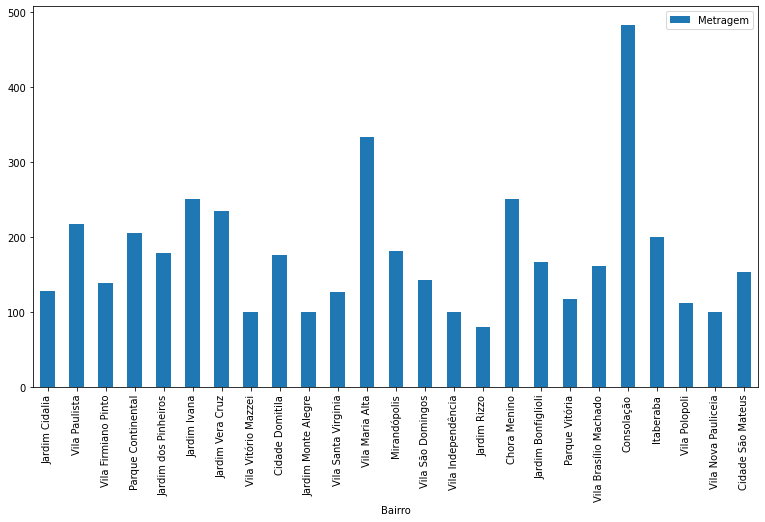

In [ ]:
metragem_bairros.sample(25).plot.bar(figsize=(13,7))

Para auxiliar na visualização da diferença existente entre as médias de metragem dos bairros.

In [ ]:
metragem_bairros.describe()

,Metragem
count,701.000000
mean,285.448322
std,1403.268009
min,10.000000
25%,135.444444
50%,184.454545
75%,265.500000
max,37000.000000


In [ ]:
dados.query("Bairro == 'Sítio Represa'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


O bairro que possue a maior média tem apenas um imóvel disponível. Assim podemos especular que o endereço com a maior metragem está localizado em um bairro com uma grande amplitude entre os valores, futuramente podemos analisar a possibilidade desse valor ser um *outlier*. 

In [ ]:
bairros_jardim = (dados.query("Bairro == 'Jardim Guedala'"))

bairros_jardim

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
88,NaN,Jardim Guedala,São Paulo,650,4,7,4,R$ 3.500.000
99,NaN,Jardim Guedala,São Paulo,354,4,6,4,R$ 2.950.000
177,NaN,Jardim Guedala,São Paulo,420,3,6,5,R$ 3.500.000
188,NaN,Jardim Guedala,São Paulo,431,4,5,5,R$ 30.000\n /Mês
...,...,...,...,...,...,...,...,...
9949,Rua Albertina de Oliveira Godinho,Jardim Guedala,São Paulo,1305,5,7,6,R$ 5.900.000
9958,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,R$ 5.000.000
9984,Rua Alvorada do Sul,Jardim Guedala,São Paulo,605,5,7,5,R$ 8.000.000
9985,Rua Albertina de Oliveira Godinho,Jardim Guedala,São Paulo,1305,5,7,6,R$ 5.900.000


Nunca ouvi falar dessa rua *NaN*, no desafio 5 falaremos sobre ela.

In [ ]:
bairros_jardim["Metragem"].max()

750000

In [ ]:
bairros_jardim["Metragem"].min()

250

Realmente o bairro Jardim Guedala tem uma grande amplitude entre os valores de mínimo e máximo.



---



# Desafio 2: Duas formas de selecionar os dados por bairro

In [ ]:
dados.query("Bairro == 'Vila Mariana'").head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000


In [ ]:
dados[dados["Bairro"] == "Vila Mariana"].head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000




---



# Desafio 3: Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão

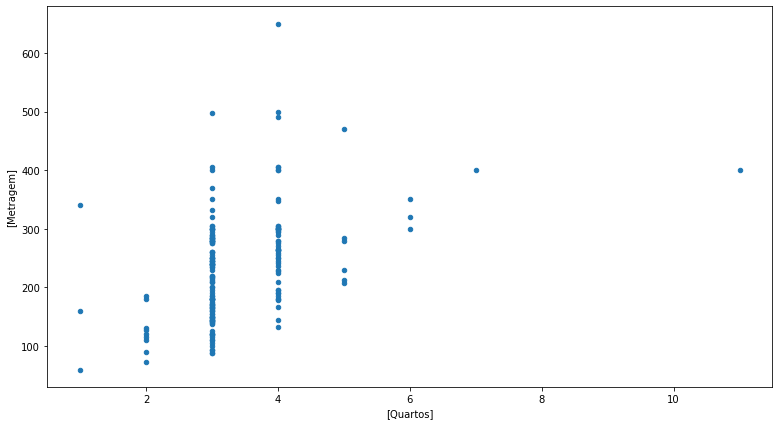

In [ ]:
bairro_vila = (dados.query("Bairro == 'Vila Mariana'"))

bairro_vila.plot.scatter(x= ["Quartos"], y = ["Metragem"], figsize=(13,7))

Ao ver esse gráfico podemos assumir que não existe uma relação forte entre a metragem e o número de quartos. Levantando mais uma vez o questionamento a respeito da corretude desses dados e das semelhanças e diferenças existentes entre os imóveis.



---



# Desafio 4: Pegar outras estatísticas dos dados

Algumas já foram usadas nos outros desafios, como os valores de mínimo e máximo. Baseado no que foi visto no desafio 3, vamos verificar o coeficiente de correlação entre os dados, para entender o quanto eles influenciam uns nos outros. 

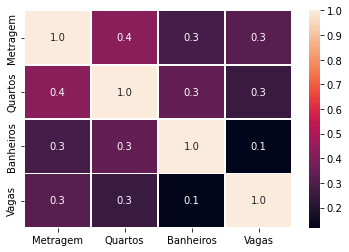

In [ ]:
import seaborn as sn

correlation = bairro_vila.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


Podemos ver que existe uma correlação fraca entre as variáveis, ou seja, elas praticamentente não interferem umas nas outras.

Isso se torna contraditório, pois era esperado que ao menos a metragem tivesse uma forte ligação com as demais. Já que quanto maior a área disponível maior a possibilidade de ter cômodos a mais.



---



# Desafio 5: Descobrir quais são os bairros que não tem nome de rua

Primeiramente iremos observar quais os dados que possuem valores nulos.

In [ ]:
dados.isnull().sum().to_frame()

,0
Rua,3434
Bairro,12
Cidade,0
Metragem,0
Quartos,0
Banheiros,0
Vagas,0
Valor,0


Vemos assim que existem 12 itens referentes aos bairros que possuem valores nulos, por ser uma quantidade pequena podemos mostrar todos eles.

In [ ]:
dados[dados['Bairro'].isna()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000


Parece ser muita coincidência que os imóveis com o número 3773 tem valor nulo para o bairro 🤔

In [ ]:
dados['Rua'].str.contains('3773').sum()

11

Sabendo que apenas 12 bairros possuem valor nulo e que apenas um deles não apresentou o número 3773, vemos que não há nenhum registro de bairro para os imóveis com esse número. Será que existe alguma explicação para isso? 😨👻

In [ ]:
sem_valor_rua = dados[dados['Rua'].isnull()]

sem_valor_rua['Bairro'].value_counts().head(10).to_frame()

,Bairro
Jardim Guedala,190
Alto de Pinheiros,169
Jardim Paulista,138
Jardim Europa,128
Jardim Leonor,118
Cidade Jardim,115
Morumbi,89
Jardim América,88
Vila Madalena,83
Brooklin Paulista,75


Por fim, podemos ver os bairros que possuem o maior número de ruas faltando. É possível tentar preencher esses valores, porém isso são cenas dos próximos capítulos. 😉